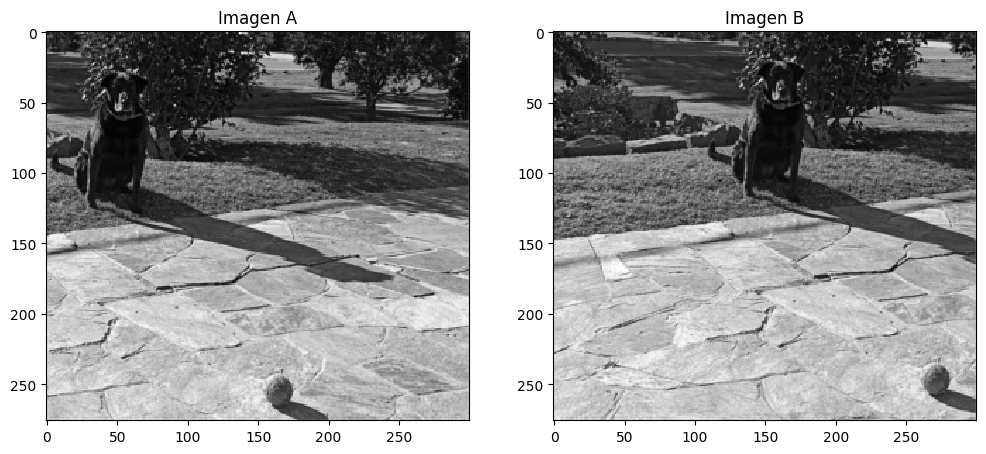

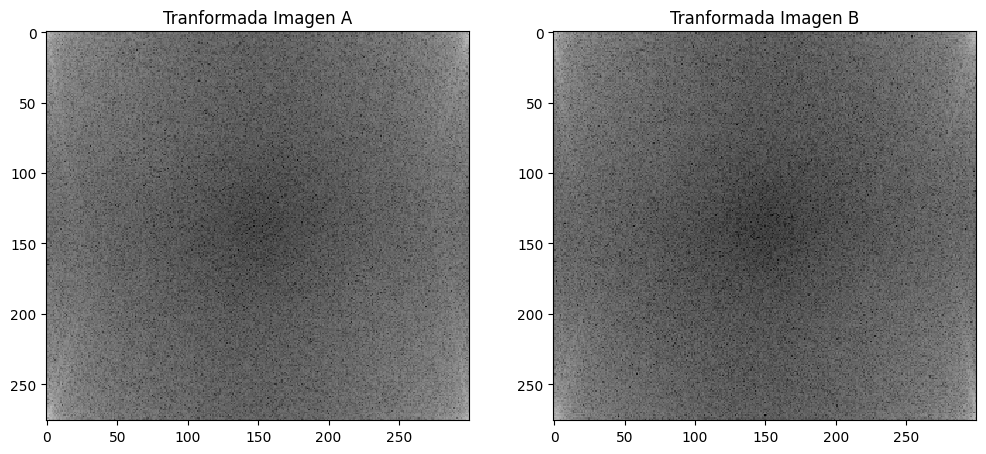

Delta x:  8 Delta y:  193


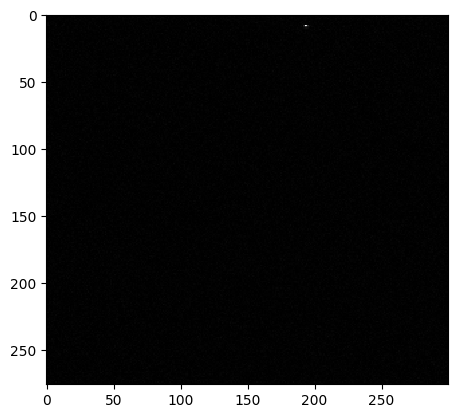

In [4]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

img = Image.open('./dog1ss.jpg').convert('L')
i_a = np.array(img)
img = Image.open('./dog2ss.jpg').convert('L')
i_b = np.array(img)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1),plt.imshow(i_a, interpolation='none', cmap='gray'),plt.title('Imagen A')
plt.subplot(1,2,2),plt.imshow(i_b, interpolation='none', cmap='gray'),plt.title('Imagen B')
plt.show()

# 2D-DFT
I_a = np.fft.fft2(i_a)
I_b = np.fft.fft2(i_b)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1),plt.imshow(np.log(np.abs(I_a)), interpolation='none', cmap='gray'),plt.title('Tranformada Imagen A')
plt.subplot(1,2,2),plt.imshow(np.log(np.abs(I_b)), interpolation='none', cmap='gray'),plt.title('Tranformada Imagen B')
plt.show()

#Conjugado
I_b_c = np.conj(I_b)

# R(u,v)
R = I_a * I_b_c / (np.abs(I_a * I_b_c))

# r(x, y)
r = np.fft.ifft2(R)

# Get the max values (x, y) from r
x, y = np.unravel_index(np.argmax(np.abs(r)), r.shape, order='C')
print("Delta x: ", x, "Delta y: ", y)

plt.figure()
plt.imshow(np.abs(r),interpolation='none', cmap='gray')
plt.show()
